# Importando bibliotecas e fazendo configurações

In [7]:
import os, sys, platform 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
### Configurando DataFrame
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 5000)

In [9]:
### Configurando gráficos
sns.set_theme(
    context='notebook', style = 'darkgrid',
    font_scale=.75, palette = 'icefire',
    rc= {
        'figure.figsize':(8,4),
        "axes.grid":True, "grid.alpha":.3,
        'axes.titlesize':'large',
        'axes.titleweight':'bold',
        'axes.titlepad':30,'axes.labelpad':15
    }
)

## Primeiras impressões 

In [10]:
PATH = r"C:\Users\U6094291\Desktop\StockPrice\customer_data_2.csv"if platform.system() == "Windows" else r"/home/usuario/Forex/customer_data_2.csv"

In [102]:
df = pd.read_csv(PATH)

In [12]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1.0,38.0,Female,99342.0,90.0,3.0,24.0,Groceries,113.53
1,2.0,21.0,Female,78852.0,60.0,2.0,42.0,NaN,41.93
2,3.0,60.0,Female,126573.0,30.0,2.0,28.0,Clothing,424.36
3,4.0,40.0,Other,47099.0,74.0,9.0,5.0,NaN,991.93
4,5.0,65.0,Female,140621.0,21.0,3.0,25.0,Electronics,347.08


In [13]:
df.sample(5)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
634,635.0,NaN,Female,122669.0,15.0,3.0,4.0,Electronics,NaN
584,585.0,51.0,Female,37310.0,6.0,5.0,14.0,Sports,706.18
949,950.0,45.0,Other,114390.0,38.0,3.0,9.0,Groceries,663.25
323,324.0,30.0,Male,119162.0,15.0,9.0,NaN,Home & Garden,NaN
124,125.0,NaN,Other,69362.0,58.0,1.0,23.0,Clothing,960.08


In [14]:
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996.0,57.0,Male,112170.0,57.0,6.0,1.0,Clothing,313.64
996,997.0,23.0,Other,65337.0,76.0,10.0,23.0,Groceries,632.83
997,998.0,23.0,Male,113097.0,40.0,5.0,42.0,Sports,75.09
998,999.0,22.0,Female,113695.0,63.0,7.0,44.0,Electronics,505.16
999,1000.0,36.0,Female,90420.0,7.0,2.0,31.0,Groceries,669.26


In [15]:
df.shape

(1000, 9)

In [16]:
# Calculando a proporção de valores nulos
null_percentage = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

# Calculando a contagem dos valores nulos
null_count = df.isnull().sum().sort_values(ascending=False)

# Combinando as duas séries em um DataFrame
null_stats = pd.DataFrame({
    'Null Percentage': null_percentage,
    "Null Contagem": null_count
})

# Aplicando estilo
styled_null_stats = null_stats.style.background_gradient()
                                  

# Exibindo o DataFrame estilizado
styled_null_stats


,Null Percentage,Null Contagem
preferred_category,6.100000,61
income,5.600000,56
gender,5.500000,55
last_purchase_amount,5.500000,55
id,5.000000,50
membership_years,5.000000,50
age,4.900000,49
spending_score,4.900000,49
purchase_frequency,4.500000,45


In [17]:
pd.DataFrame((df.isnull().sum()\
              .sort_values(ascending=False)/len(df))*100)\
                .style.bar(color='red')\
                .set_caption("<H1>Null values in the DataFrame</H1>")

,0
preferred_category,6.100000
income,5.600000
gender,5.500000
last_purchase_amount,5.500000
id,5.000000
membership_years,5.000000
age,4.900000
spending_score,4.900000
purchase_frequency,4.500000


In [18]:
df.duplicated().sum()

0

In [19]:
pd.DataFrame(df.nunique().sort_values(ascending=False))\
    .style.bar(color='darkblue')\
        .set_caption("<H1>Unique values for each column</H1>")

,0
id,950
income,941
last_purchase_amount,939
spending_score,109
age,52
purchase_frequency,50
membership_years,10
gender,7
preferred_category,6


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    950 non-null    float64
 1   age                   951 non-null    float64
 2   gender                945 non-null    object 
 3   income                944 non-null    float64
 4   spending_score        951 non-null    float64
 5   membership_years      950 non-null    float64
 6   purchase_frequency    955 non-null    float64
 7   preferred_category    939 non-null    object 
 8   last_purchase_amount  945 non-null    float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [21]:
df.drop(columns='id', inplace=True)
# Não será necessário utilizar essa coluna

In [22]:
for column in df.columns:
    print(f'{column}', '\n',"the values are spread: ", df[column].nunique(),
           df[column].unique())

age 
 the values are spread:  52 [38. 21. 60. 40. 65. 31. 19. 43. 53. 55. 23. 68. 29. 64. 33. 57. 22. 37.
 36. 41. 69. 54. 30. 18. nan 44. 45. 47. 48. 52. 35. 28. 50. 49. 56. 61.
 24. 42. 63. 27. 32. 58. 59. 39. 46. 26. 20. 62. 67. 51. 25. 34. 66.]
gender 
 the values are spread:  7 ['Female' 'Other' 'Male' nan 'male' 'M' 'female' 'F']
income 
 the values are spread:  941 [  99342.   78852.  126573.   47099.  140621.   57305.   54319.  108115.
      nan   45839.   69659.   30058.   87461.   33018.  112260.  129284.
  102535.   41849.   95491.   97103.   82519.   49077.   85473.   81758.
   36140.  141757.   35394.   50680.   70721.  104106.   76756.   45733.
   71951.   86593.   73464.  108074.   81794.   75392.  107057.   70723.
  115529.   72179.   62405.   42404.   94531.   76317.   85309.  146519.
   61290.   96082.  134241.   45136.   85476.   73466.  112198.   81595.
  139387.   69133.   89149.   79992.   85111.   90557.  100270.  127346.
   87807.  135861.   40936.   66376.   56

In [23]:
df.describe(include="number").style.background_gradient(subset =["age", 	"income",	
                                                                 "spending_score",	"membership_years",
                                                                "purchase_frequency",	"last_purchase_amount"]) 

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,951.000000,944.000000,951.000000,950.000000,955.000000,945.000000
mean,43.915878,98053.760593,54.931651,5.460000,26.514136,492.320042
std,14.994289,98879.271381,54.227014,2.863229,14.223160,294.994270
min,18.000000,30004.000000,1.000000,1.000000,1.000000,10.400000
25%,30.000000,58665.000000,27.000000,3.000000,15.000000,218.770000
50%,45.000000,88088.500000,52.000000,5.000000,27.000000,491.640000
75%,57.000000,117712.250000,77.000000,8.000000,39.000000,746.740000
max,69.000000,1329680.000000,840.000000,10.000000,50.000000,998.980000


In [24]:
df.describe(include="object").T.style.background_gradient(subset=['count','unique','freq'])

,count,unique,top,freq
gender,945,7,Male,332
preferred_category,939,6,Sports,200


# Select numbers and category 

In [25]:
df_num = df.select_dtypes(include="number")
df_cat = df.select_dtypes(include="object")

## Numbers

In [26]:
for column in df_num:
  print("A mínima de " f"{column}" " é de: " +'{:.2f}'.format(round(df_num[column].min())))
  print("A mediana de " f"{column}" " é de: " +'{:.2f}'.format(round(df_num[column].median())))
  print("O Desvio Padrão de " f"{column}" " é de: " +'{:.2f}'.format(round(df_num[column].std())))
  print("A Variancia de " f"{column}" " é de: " +'{:.2f}'.format(round(df_num[column].var())))
  print("O Amplitude de " f"{column}" " é de: " +'{:.2f}'.format(round(df_num[column].max() - df_num[column].min())))
  print("O coeficiente de Variação de " f"{column}" " é de: "+ '{:.2f}'.format(round(df_num[column].std() / df_num[column].mean()*100)))
  print("A maxima de " f"{column}" " é de: " +'{:.2f}'.format(round(df_num[column].max())))

  print("--"*25)

A mínima de age é de: 18.00
A mediana de age é de: 45.00
O Desvio Padrão de age é de: 15.00
A Variancia de age é de: 225.00
O Amplitude de age é de: 51.00
O coeficiente de Variação de age é de: 34.00
A maxima de age é de: 69.00
--------------------------------------------------
A mínima de income é de: 30004.00
A mediana de income é de: 88088.00
O Desvio Padrão de income é de: 98879.00
A Variancia de income é de: 9777110309.00
O Amplitude de income é de: 1299676.00
O coeficiente de Variação de income é de: 101.00
A maxima de income é de: 1329680.00
--------------------------------------------------
A mínima de spending_score é de: 1.00
A mediana de spending_score é de: 52.00
O Desvio Padrão de spending_score é de: 54.00
A Variancia de spending_score é de: 2941.00
O Amplitude de spending_score é de: 839.00
O coeficiente de Variação de spending_score é de: 99.00
A maxima de spending_score é de: 840.00
--------------------------------------------------
A mínima de membership_years é de: 1

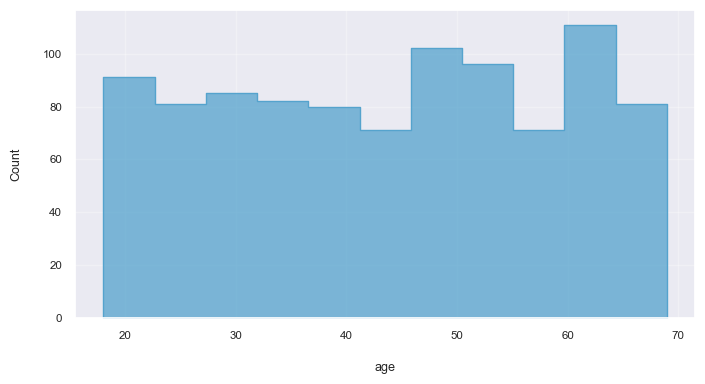

<Figure size 1200x800 with 0 Axes>

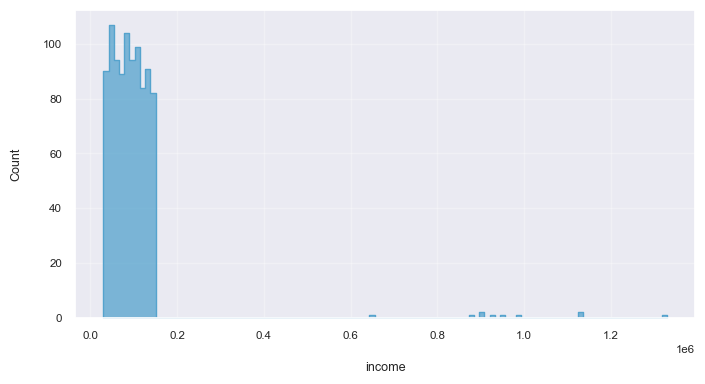

<Figure size 1200x800 with 0 Axes>

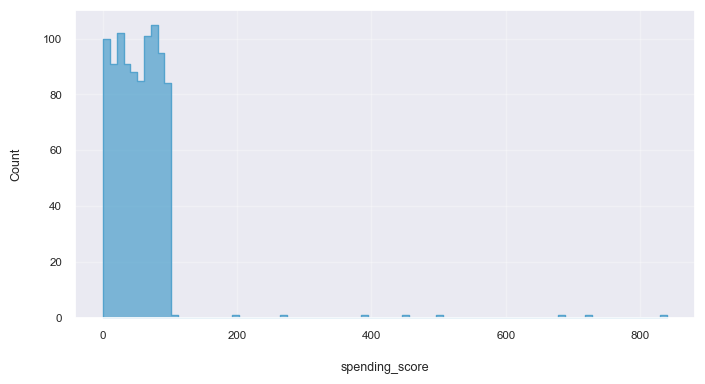

<Figure size 1200x800 with 0 Axes>

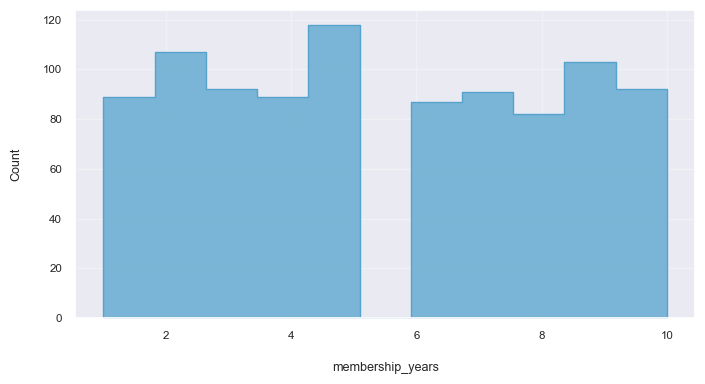

<Figure size 1200x800 with 0 Axes>

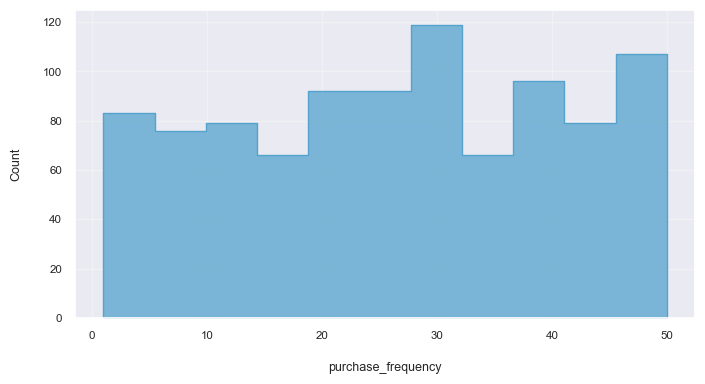

<Figure size 1200x800 with 0 Axes>

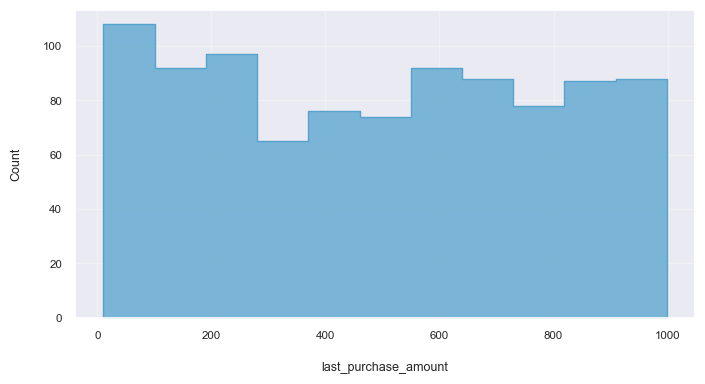

<Figure size 1200x800 with 0 Axes>

In [27]:
for column in df_num:
    sns.histplot(x=column,data=df_num, kde=False, element="step")
    plt.figure(figsize=(12,8))
    plt.show()

## years

In [56]:
pd.DataFrame(data = df.groupby(df['membership_years']).agg({"income":['mean', 'median'], 
                                                "purchase_frequency":  ['mean', 'median'],
                                                'spending_score':  ['mean', 'median'],
                                                "last_purchase_amount":['mean', 'median']})
                                                ).style.background_gradient().set_caption("<h3>Purchase frequency according with the gender </h3>")

array([[<Axes: title={'center': '(income, mean)'}, xlabel='membership_years'>,
        <Axes: title={'center': '(income, median)'}, xlabel='membership_years'>],
       [<Axes: title={'center': '(purchase_frequency, mean)'}, xlabel='membership_years'>,
        <Axes: title={'center': '(purchase_frequency, median)'}, xlabel='membership_years'>],
       [<Axes: title={'center': '(spending_score, mean)'}, xlabel='membership_years'>,
        <Axes: title={'center': '(spending_score, median)'}, xlabel='membership_years'>],
       [<Axes: title={'center': '(last_purchase_amount, mean)'}, xlabel='membership_years'>,
        <Axes: title={'center': '(last_purchase_amount, median)'}, xlabel='membership_years'>]],
      dtype=object)

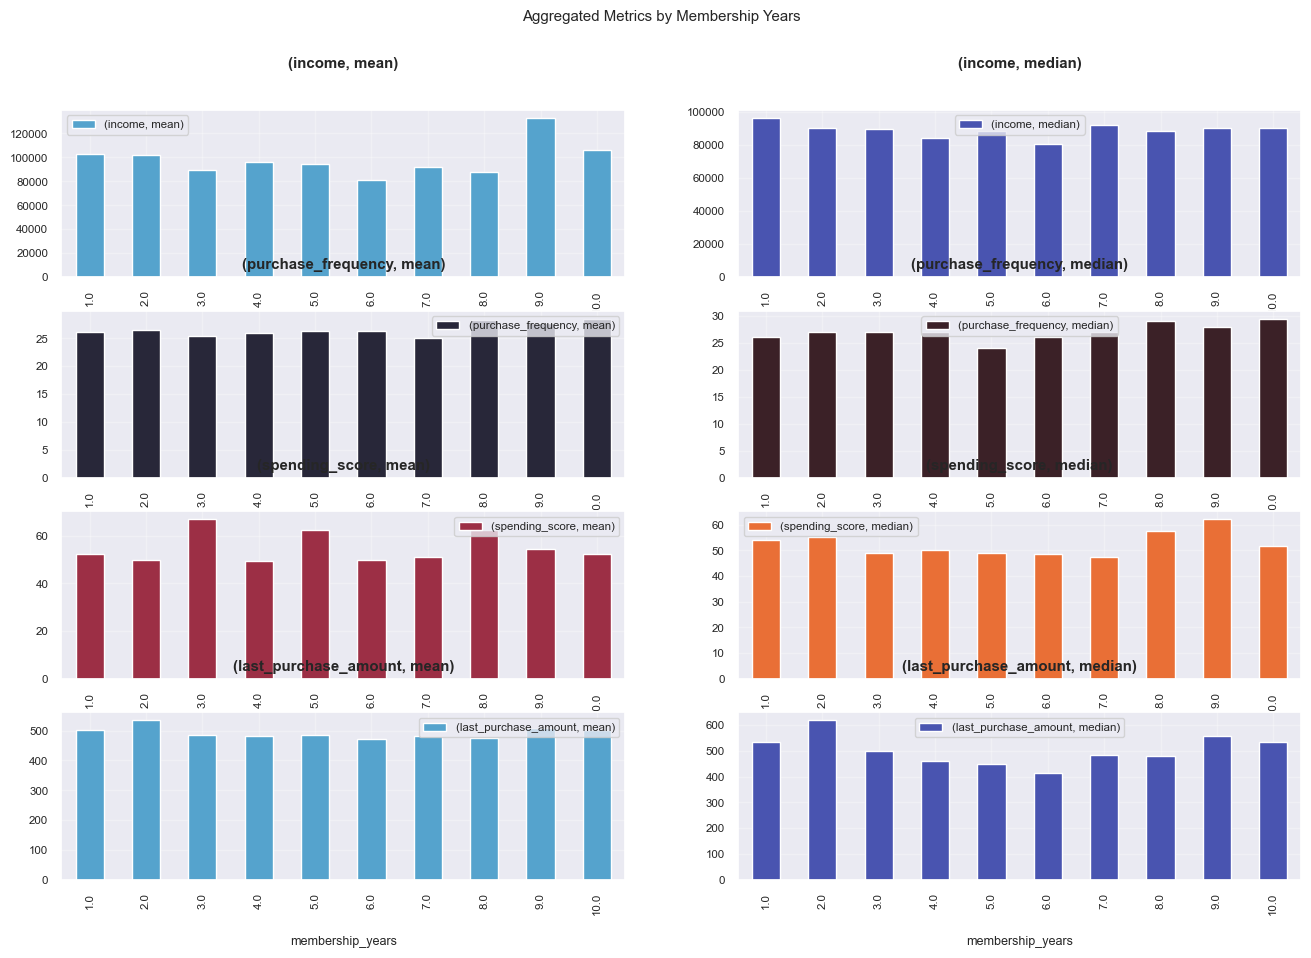

In [71]:
pd.DataFrame(data = df.groupby(df['membership_years']).agg({"income":['mean', 'median'], 
                                                "purchase_frequency":  ['mean', 'median'],
                                                'spending_score':  ['mean', 'median'],
                                                "last_purchase_amount":['mean', 'median']})
                                                ).plot(kind='bar', figsize=(16, 10), subplots=True, layout=(4, 2),
                                                        sharex=False, title='Aggregated Metrics by Membership Years')

### Categóricos 

Tratamento

### Gender

In [28]:
mapa_genero = {
    'M': 'Male',
    'male': 'Male',
    'F': 'Female',
    'female': 'Female',
    'Male': 'Male',
    'Female': 'Female',
    'Other': 'Other'
}
# Substituir valores
df['gender'] = df['gender'].map(mapa_genero)

In [29]:
df['gender'].unique()

array(['Female', 'Other', 'Male', nan], dtype=object)

In [30]:
df['gender'].value_counts()

gender
Male      339
Other     306
Female    300
Name: count, dtype: int64

In [80]:
pd.DataFrame(data = df.groupby(df['gender']).agg({"income":['mean', 'median', 'sum'], 
                                                "purchase_frequency":  ['mean', 'median', 'sum'],
                                                'spending_score':  ['mean', 'median', 'sum'],
                                                "last_purchase_amount":['mean', 'median', 'sum']})
                                                ).style.background_gradient().set_caption("<h3>Consumption according with gender </h3>")

array([[<Axes: title={'center': '(income, mean)'}, xlabel='gender'>,
        <Axes: title={'center': '(income, median)'}, xlabel='gender'>],
       [<Axes: title={'center': '(purchase_frequency, mean)'}, xlabel='gender'>,
        <Axes: title={'center': '(purchase_frequency, median)'}, xlabel='gender'>],
       [<Axes: title={'center': '(spending_score, mean)'}, xlabel='gender'>,
        <Axes: title={'center': '(spending_score, median)'}, xlabel='gender'>],
       [<Axes: title={'center': '(last_purchase_amount, mean)'}, xlabel='gender'>,
        <Axes: title={'center': '(last_purchase_amount, median)'}, xlabel='gender'>]],
      dtype=object)

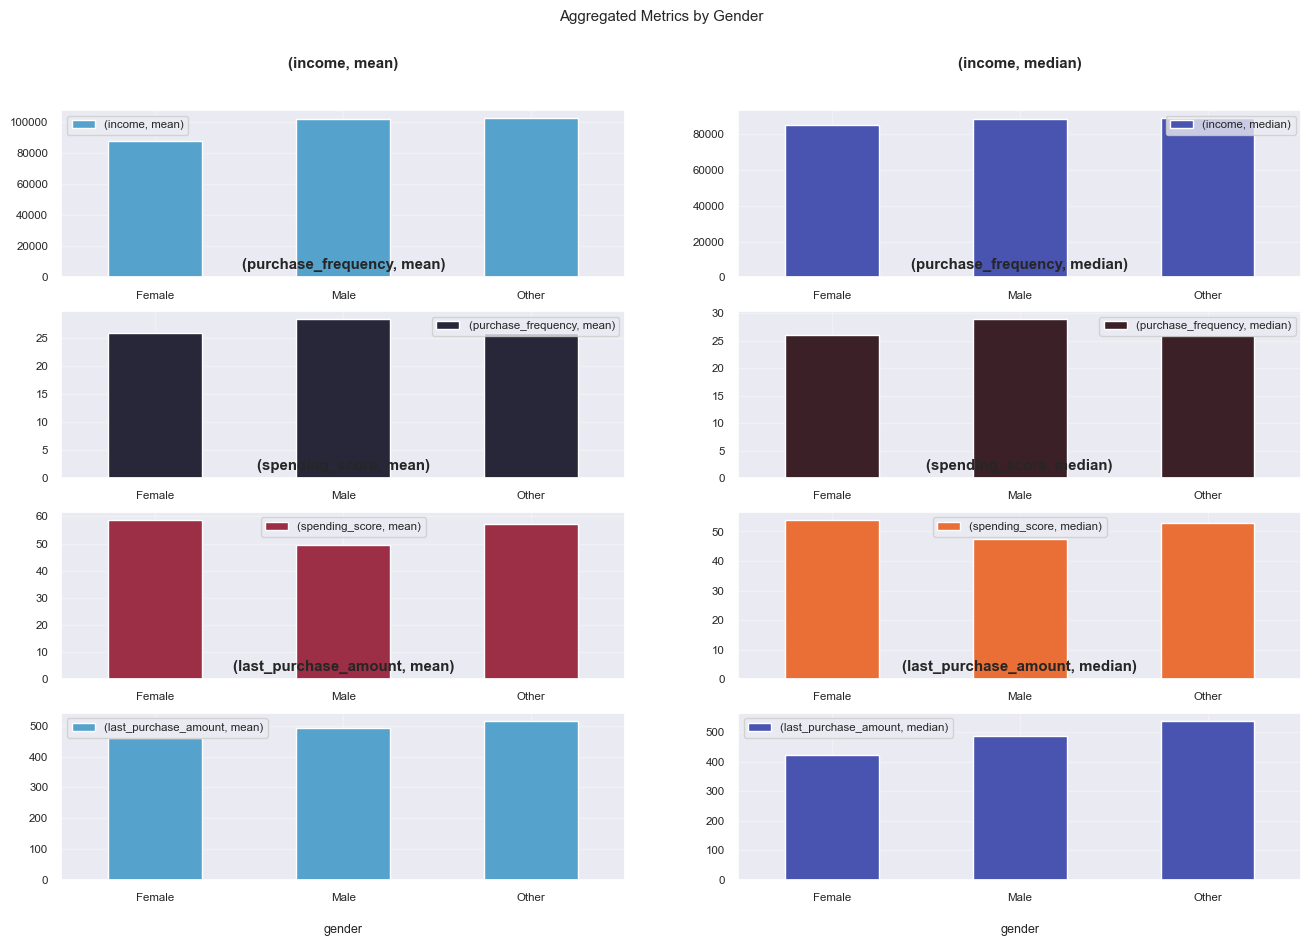

In [76]:
pd.DataFrame(data = df.groupby(df['gender']).agg({"income":['mean', 'median'], 
                                                "purchase_frequency":  ['mean', 'median'],
                                                'spending_score':  ['mean', 'median'],
                                                "last_purchase_amount":['mean', 'median']})
                                                ).plot(kind='bar', figsize=(16, 10), subplots=True, layout=(4, 2),
                                                        sharex=False, title='Aggregated Metrics by Gender', rot=360)

## Category

In [35]:
df['preferred_category'].value_counts()

preferred_category
Sports           200
Electronics      196
Home & Garden    192
Groceries        189
Clothing         158
Elec               4
Name: count, dtype: int64

In [36]:
mapa_categoria = {
    'Elec':'Electronics', 
    'Sports'           :"Sports",
    'Electronics'      :"Electronics",
    'Home & Garden'    :"Home & Garden",
    'Groceries'        :"Groceries",
    'Clothing'         :"Clothing"
}

df['preferred_category'] = df['preferred_category'].map(mapa_categoria)

In [37]:
# Analisando ambas as vairiáveis categóricas
pd.DataFrame(data = pd.crosstab(df['gender'], df['preferred_category'])).style.background_gradient()

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
gender,,,,,
Female,50,61,59,58,54
Male,53,63,66,68,73
Other,49,65,55,51,62


In [38]:
pd.DataFrame(data = df.groupby(df['preferred_category']).agg({"purchase_frequency":['min', 'mean', 'median', 'std','max', 'sum']})).style.background_gradient().set_caption("<h3>Purchase frequency according with the category </h3>")

In [39]:
pd.DataFrame(data = df.groupby(df['preferred_category']).agg({"spending_score":['min', 'mean', 'median', 'std','max', 'sum']})).style.background_gradient().set_caption("<h3>Spending category according with the category </h3>")

In [47]:
pd.DataFrame(data = df.groupby(df['preferred_category']).agg({"income":  ['mean', 'median', 'sum'], 
                                                  "purchase_frequency":  ['mean', 'median', 'sum'],
                                                  
                                                  "last_purchase_amount":['mean', 'median', 'sum']
                                                  })).style.background_gradient().set_caption("<h3>Purchase frequency according with the gender </h3>")

In [40]:
pd.crosstab(df['gender'], df['preferred_category'])

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
gender,,,,,
Female,50,61,59,58,54
Male,53,63,66,68,73
Other,49,65,55,51,62


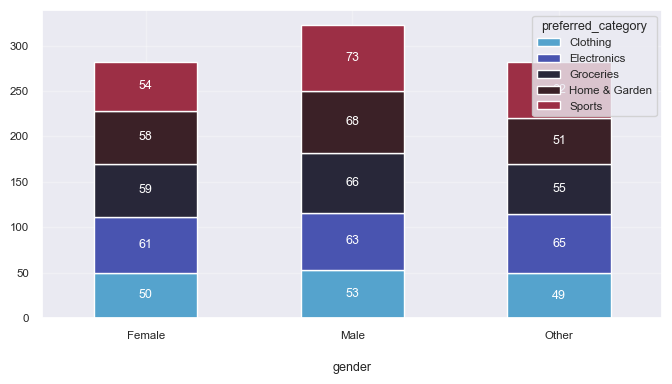

In [41]:
# Analisando ambas as vairiáveis categóricas
ax = pd.crosstab(df['gender'], df['preferred_category']).plot(kind="bar", stacked=True, rot=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Apenas adicionar texto para barras que têm altura maior que 0
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.), ha='center', va='center', color ='white')

plt.show()

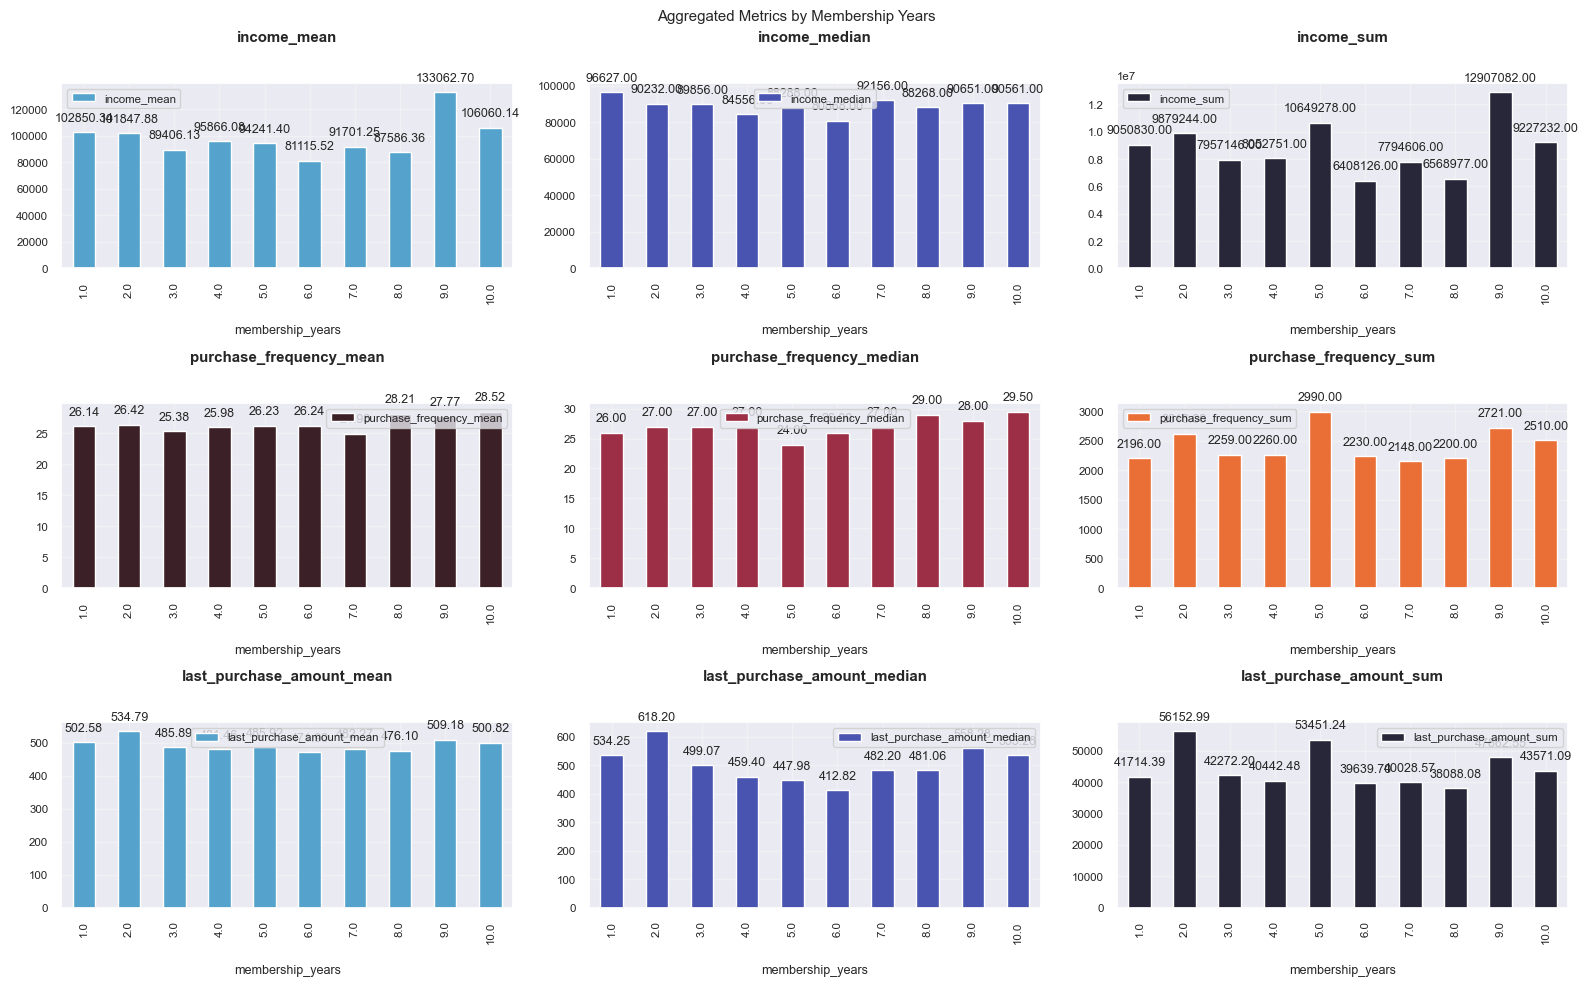

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame
# df = ...

# Agrupando por 'membership_years' e aplicando múltiplas funções de agregação
grouped_df = df.groupby('membership_years').agg({
    "income": ['mean', 'median', 'sum'],
    "purchase_frequency": ['mean', 'median', 'sum'],
    "last_purchase_amount": ['mean', 'median', 'sum']
})

# Renomeando as colunas resultantes para facilitar o uso no plot
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]

# Plotando o gráfico de barras
ax = grouped_df.plot(kind='bar', figsize=(16, 10), subplots=True, layout=(3, 3), sharex=False, title='Aggregated Metrics by Membership Years')

# Adicionando anotações
for axes in ax.flatten():  # Iterando sobre todos os subplots
    if axes:  # Verificando se o subplot existe
        for p in axes.patches:  # Iterando sobre todas as barras do subplot
            height = p.get_height()
            axes.annotate(f'{height:.2f}', 
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')

plt.tight_layout()
plt.show()


In [42]:
pd.crosstab(df['preferred_category'], df['gender']).sort_values(by='preferred_category').reset_index()

gender,preferred_category,Female,Male,Other
0,Clothing,50,53,49
1,Electronics,61,63,65
2,Groceries,59,66,55
3,Home & Garden,58,68,51
4,Sports,54,73,62


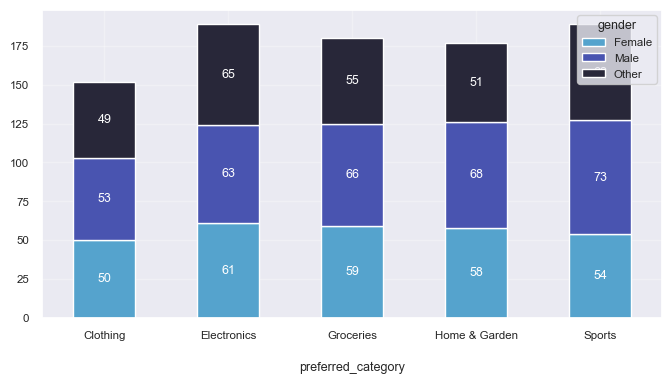

In [43]:
ax = pd.crosstab(df['preferred_category'], df['gender']).plot(kind="bar", stacked=True, rot=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Apenas adicionar texto para barras que têm altura maior que 0
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.), ha='center', va='center', color ='white')

plt.show()

# Cluster

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth

In [105]:
X = (df
     .drop(columns = ['id'], axis=1)
     .dropna()  # Remove linhas com valores ausentes
     .assign(
         gender=lambda x: x['gender'].map(mapa_genero),
         preferred_category=lambda x: x['preferred_category'].map(mapa_categoria)
     )
     .assign(
         gender=lambda x: x['gender'].map({'Female': 0, 'Male': 1, 'Other': 2}),
         preferred_category=lambda x: pd.factorize(x['preferred_category'])[0]
     )
)

In [106]:
X

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38.0,0,99342.0,90.0,3.0,24.0,0,113.53
2,60.0,0,126573.0,30.0,2.0,28.0,1,424.36
4,65.0,0,140621.0,21.0,3.0,25.0,2,347.08
...,...,...,...,...,...,...,...,...
997,23.0,1,113097.0,40.0,5.0,42.0,4,75.09
998,22.0,0,113695.0,63.0,7.0,44.0,2,505.16
999,36.0,0,90420.0,7.0,2.0,31.0,0,669.26


In [97]:
df

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38.0,Female,99342.0,90.0,3.0,24.0,Groceries,113.53
1,21.0,Female,78852.0,60.0,2.0,42.0,NaN,41.93
2,60.0,Female,126573.0,30.0,2.0,28.0,Clothing,424.36
...,...,...,...,...,...,...,...,...
997,23.0,Male,113097.0,40.0,5.0,42.0,Sports,75.09
998,22.0,Female,113695.0,63.0,7.0,44.0,Electronics,505.16
999,36.0,Female,90420.0,7.0,2.0,31.0,Groceries,669.26


In [ ]:
# Supondo que X seja o DataFrame após as transformações
# X = ...

# Selecionar as colunas numéricas para clustering
# (certifique-se de selecionar as colunas que fazem sentido para o clustering)
features = X[['age', 'gender', 'preferred_category', 'income']]  # Ajuste conforme necessário

# Normalizar os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)